# **import libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #train and test split dataset

# imports for ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout
from keras.layers import Activation

import pickle #to deploy model on python flask

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Cancer_Detection_Final/Dataset/cancer_diagnosis.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# remove unnecessary columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# **Data preprocessing and EDA(exploratory data analysis)**

In [11]:
# Looking at the columns name
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
## verifying dataset's columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
## verifying if there's missing values 
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
## Summary of dataset 
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<ipython-input-15-e3c81e79ea7a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)


<Axes: >

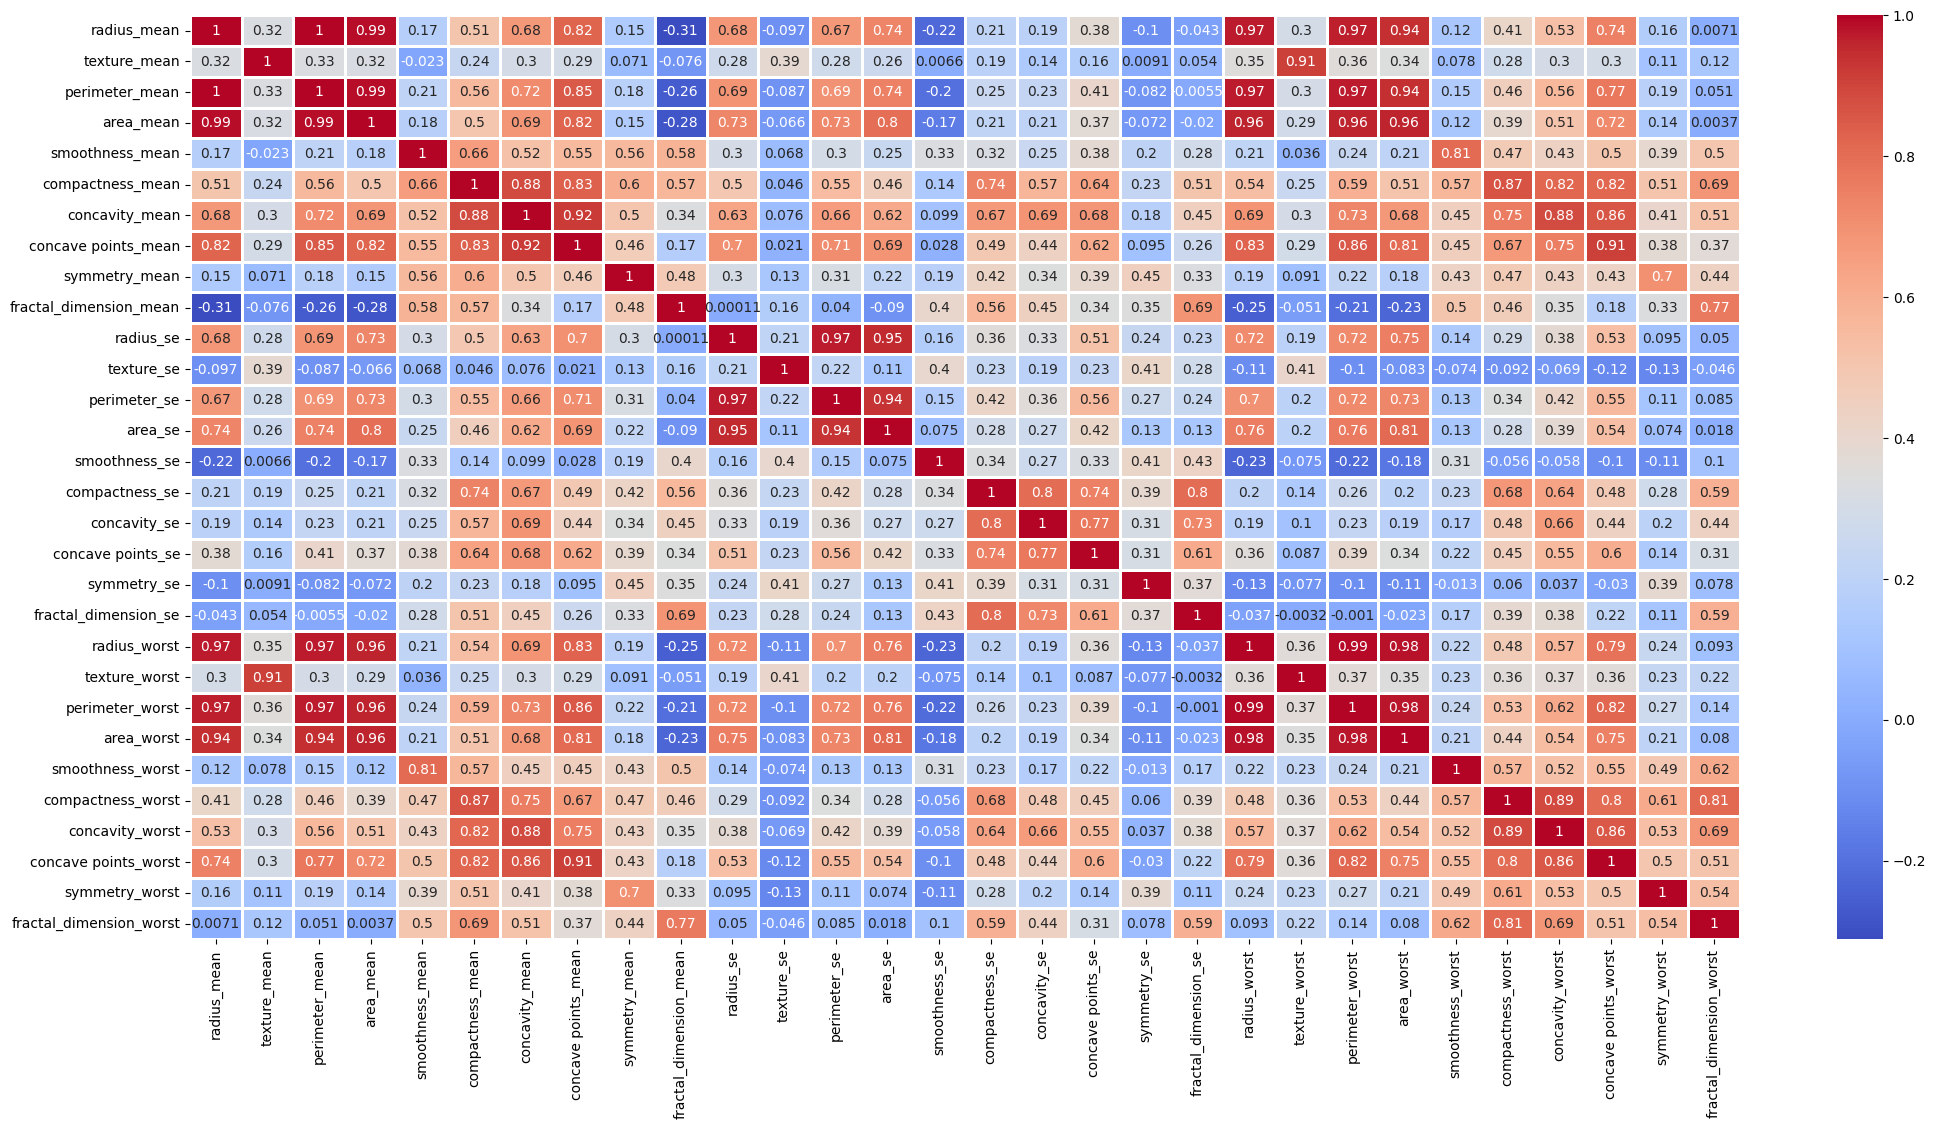

In [15]:
## check correlations of each column
fig, ax = plt.subplots()
fig.set_size_inches(25, 12)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

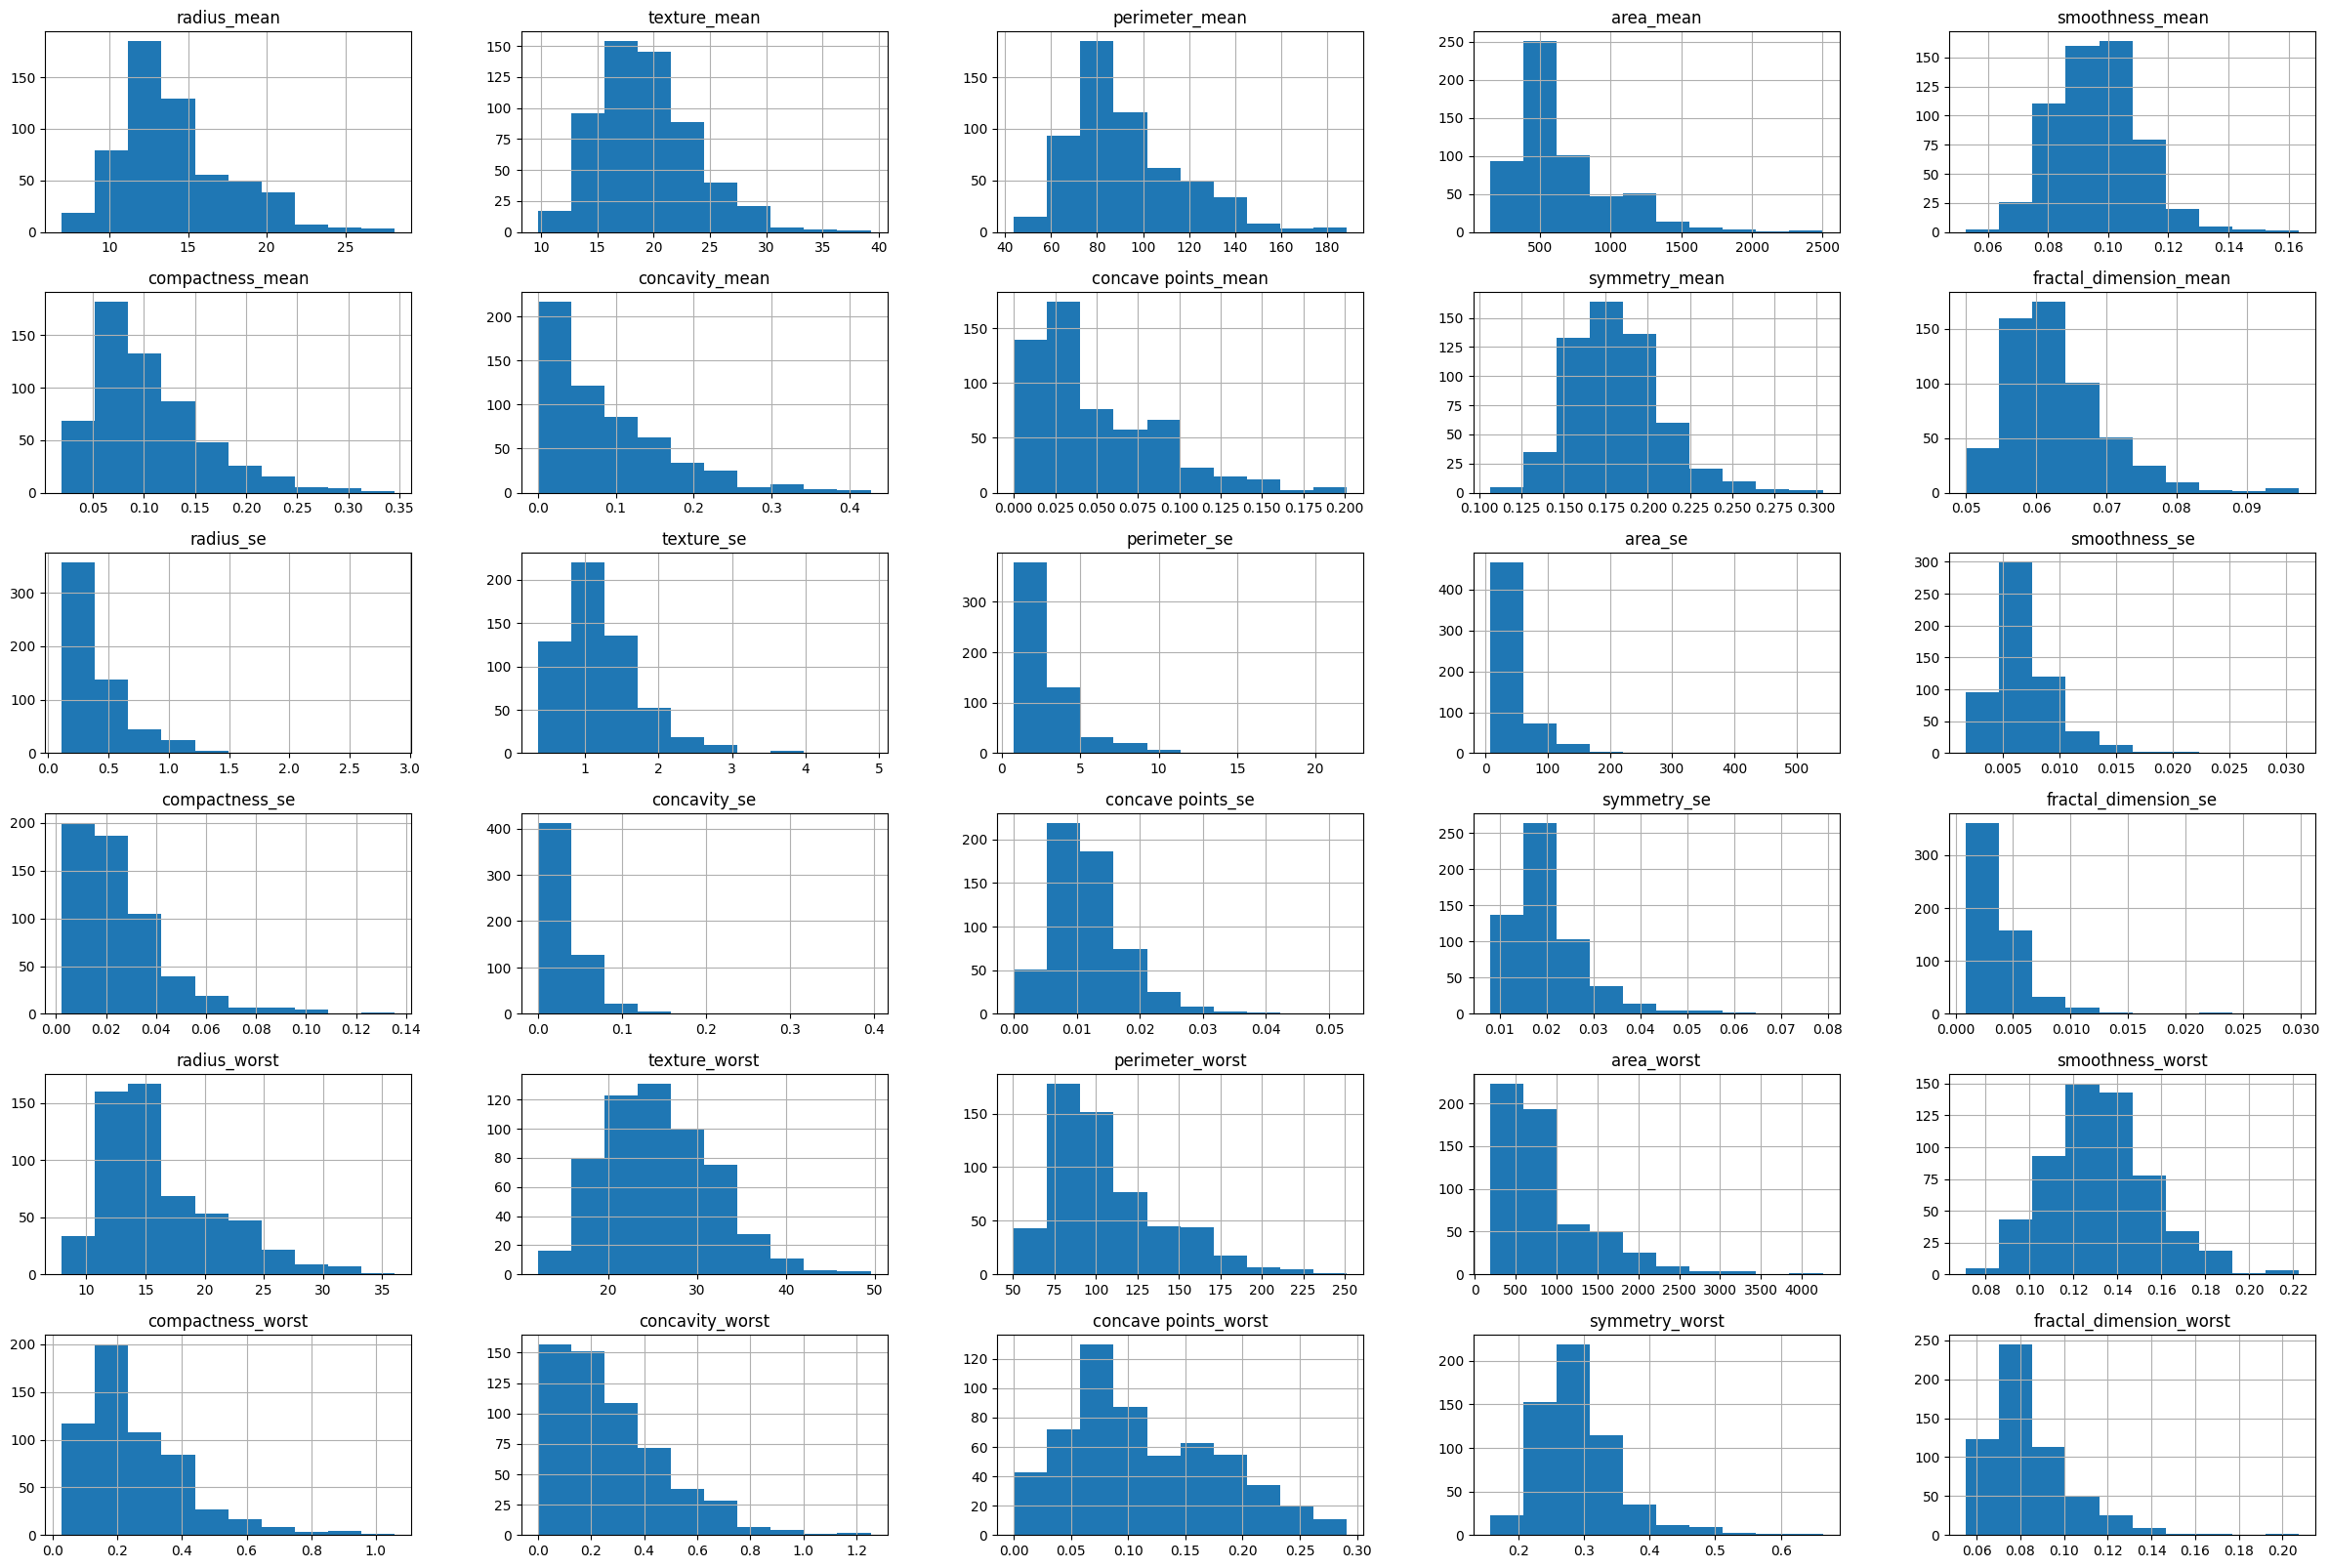

In [16]:
# Plot histograms of each parameter in the dataset for visuals
df.hist(figsize = (30,20))
plt.show()

Total count of Malignant and Benign diagnosis:
 B    357
M    212
Name: diagnosis, dtype: int64


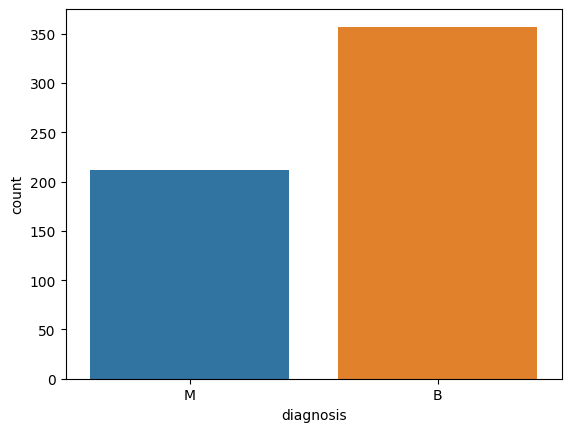

In [17]:
## Verifying value counts of our target column that is 'diagnosis'
##  B = Benign (not harmful)
##  M = Malignant (harmful)

sns.countplot(x='diagnosis', data=df)

# seeing how many values there are in 'label' and counting 
# the total of malignant and benign
mb_total = df['diagnosis'].value_counts()
print("Total count of Malignant and Benign diagnosis:\n", mb_total) 

In [18]:
## converting the target values of 'diagnosis' with numeric values
## M = Malignant = 0
## B = Benign = 1
df["diagnosis"]=df["diagnosis"].map({"M":0,"B":1})

# **Creating dependent and independent variables**

In [19]:
## creating 'x' variable and we are taking all columns except our target 
# and we are taking 'diagnosis' column as the 'y' variable
x = df.drop(columns=['diagnosis'],axis=1)
y = df['diagnosis']

## Feature Engineering One Hot Encoding

In [20]:
y = pd.get_dummies(y)

In [21]:
print(y)

     0  1
0    1  0
1    1  0
2    1  0
3    1  0
4    1  0
..  .. ..
564  1  0
565  1  0
566  1  0
567  1  0
568  0  1

[569 rows x 2 columns]


# **Splitting the dataset into training and testing**

In [22]:
## spliting the dataset into training and testing
## training = 80% 
## testing = 20%           
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=0)
#print shapes of x/y train/test to verify
print('x train: ', x_train.shape)
print('x test: ',  x_test.shape)
print('y train: ', y_train.shape)
print('y test: ',  y_test.shape)

x train:  (455, 30)
x test:  (114, 30)
y train:  (455, 2)
y test:  (114, 2)


# **ANN model (artificial neural network)**

In [23]:
# building model 
model = Sequential()
#input layer set to 30 (30 features for X)
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2)) #avoid overfitting
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 44,962
Trainable params: 44,962
Non-traina

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')

In [26]:
# Saving model as H5 file to deploy on python flask

In [27]:
#testing accuracy with epochs and saving to H5 files
best_model_save = tf.keras.callbacks.ModelCheckpoint(
    'breast_cancer_diagnosis_features_model.h5',
    monitor = "val_loss",
    verbose= 0,
    save_best_only = True,
    save_weights_only = False,
    mode = "min",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None,
)

epochs = 70

model_history=model.fit(x_train,y_train,
          batch_size=5,
          epochs=epochs,
          validation_data=(x_test,y_test),  callbacks=[best_model_save])

Epoch 1/70
91/91 [==============================] - 3s 10ms/step - loss: 3.1288 - accuracy: 0.7011 - val_loss: 2.1954 - val_accuracy: 0.5965
Epoch 2/70
91/91 [==============================] - 1s 6ms/step - loss: 0.9554 - accuracy: 0.8066 - val_loss: 0.5685 - val_accuracy: 0.7982
Epoch 3/70
91/91 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8813 - val_loss: 0.3141 - val_accuracy: 0.8596
Epoch 4/70
91/91 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8901 - val_loss: 0.3330 - val_accuracy: 0.9123
Epoch 5/70
91/91 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8923 - val_loss: 0.2190 - val_accuracy: 0.9298
Epoch 6/70
91/91 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8857 - val_loss: 0.4187 - val_accuracy: 0.8333
Epoch 7/70
91/91 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.8769 - val_loss: 0.2851 - val_accuracy: 0.9035
Epoch 8/70
91/91 [=

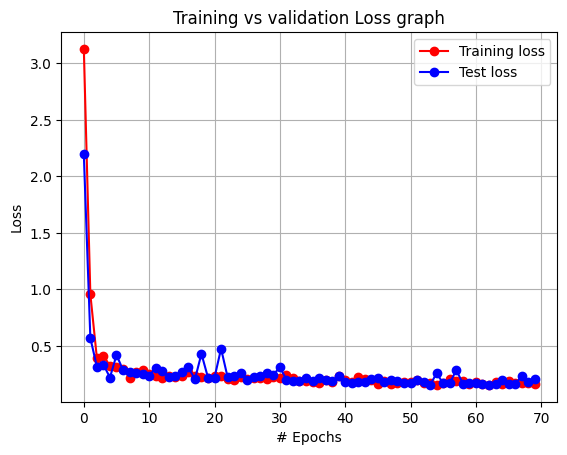

In [28]:
#plotting results of training loss and test loss 
plt.plot(range(epochs), model_history.history['loss'], 'ro-', label="Training loss")
plt.plot(range(epochs), model_history.history['val_loss'], 'bo-', label="Test loss")
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation Loss graph")
plt.legend()
plt.grid()
#plt.show()

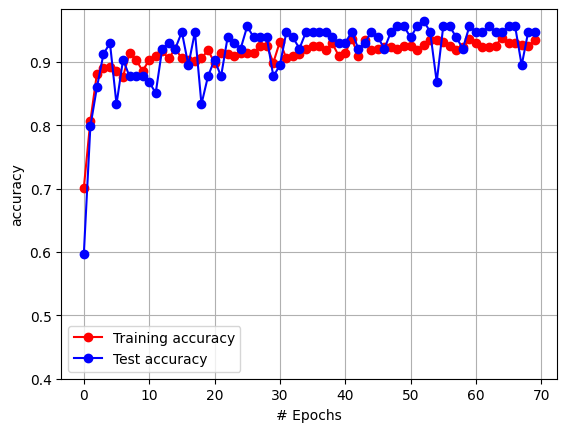

In [29]:
#plotting results of training accuracy and val accuracy with epochs
plt.plot(range(epochs), model_history.history['accuracy'], 'ro-', label="Training accuracy")
plt.plot(range(epochs), model_history.history['val_accuracy'], 'bo-', label="Test accuracy")
plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9])
plt.xlabel("# Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()

In [30]:
# Obtain probabilities of each class
probs = model.predict(x_test)
# Format the probabilities to two decimal places
# probs = [[round(p[0], 2), round(1 - p[0], 2)] for p in probs]
probs = [round(p[0], 2) for p in probs]

# Print the probabilities
probs

4/4 [==============================] - 0s 4ms/step


[0.89,
 0.0,
 0.0,
 0.28,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.13,
 0.0,
 0.33,
 0.09,
 0.96,
 0.0,
 1.0,
 0.86,
 1.0,
 1.0,
 0.38,
 0.0,
 0.0,
 0.91,
 0.08,
 0.0,
 0.01,
 0.0,
 1.0,
 0.0,
 1.0,
 0.14,
 0.98,
 0.0,
 0.99,
 0.18,
 1.0,
 0.01,
 0.98,
 0.62,
 0.0,
 0.98,
 0.0,
 0.27,
 1.0,
 0.0,
 0.02,
 0.0,
 0.9,
 0.84,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 1.0,
 0.57,
 1.0,
 0.0,
 0.0,
 1.0,
 0.13,
 1.0,
 1.0,
 1.0,
 0.0,
 0.4,
 1.0,
 0.0,
 0.05,
 1.0,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.84,
 1.0,
 1.0,
 0.0,
 0.67,
 0.0,
 0.01,
 0.0,
 1.0,
 1.0,
 0.0,
 0.64,
 0.28,
 0.42,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.02,
 1.0,
 0.0,
 0.82,
 0.27,
 0.51,
 0.36,
 0.01,
 0.87,
 1.0,
 0.16]